In [17]:
import keras
import pandas
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [18]:
#read the data
link= 'https://drive.google.com/file/d/1rkNDFivdgZU0uhkTRmi7rDq__UOkUnf_/view?usp=drive_link'
id= link.split("/")[-2]
downloaded= drive.CreateFile({'id':id})
downloaded.GetContentFile('diabetes.csv')
df=pd.read_csv('diabetes.csv', header= None, engine='python').values

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(df[:,0:8], df[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(4, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

Epoch 1/100
18/18 [==============================] - 7s 6ms/step - loss: 4.2663 - acc: 0.5642
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 2.5329 - acc: 0.6302
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 2.2708 - acc: 0.6372
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 2.0805 - acc: 0.6024
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 1.8493 - acc: 0.6198
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 1.6749 - acc: 0.6181
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 1.4608 - acc: 0.6007
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 1.3007 - acc: 0.6181
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 1.1738 - acc: 0.6319
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 1.0821 - acc: 0.6198
Epoch 11/100
18/18 [==============================] - 0s 7m

Problem with changed data source to breast cancer dataset

In [5]:
#read the data
link= 'https://drive.google.com/file/d/1A3nctxJ9u-UklbdM0D3RD5eL0QMjIKTT/view?usp=drive_link'
id= link.split("/")[-2]
downloaded= drive.CreateFile({'id':id})
downloaded.GetContentFile('breastcancer.csv')
df=pd.read_csv('breastcancer.csv', engine='python')

In [6]:
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# load dataset
cancer_data = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer_data.data, cancer_data.target,
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_nn = Sequential() # create model
my_nn.add(Dense(20, input_dim=30, activation='relu')) # hidden layer 1
my_nn.add(Dense(1, activation='sigmoid')) # output layer
my_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_nn_fitted = my_nn.fit(X_train, Y_train, epochs=100,
                         initial_epoch=0)
print(my_nn.summary())
print(my_nn.evaluate(X_test, Y_test))


Epoch 1/100
14/14 [==============================] - 2s 3ms/step - loss: 62.6084 - acc: 0.3803
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 25.6413 - acc: 0.3803
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 5.3611 - acc: 0.5751
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 2.3561 - acc: 0.6056
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 1.6691 - acc: 0.7700
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 1.4431 - acc: 0.7347
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 1.2072 - acc: 0.8005
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 1.1035 - acc: 0.7887
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 1.0630 - acc: 0.7911
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 1.0245 - acc: 0.8169
Epoch 11/100
14/14 [==============================] - 0s 

Normalize the data before feeding the data to the model

In [8]:
#read the data
link= 'https://drive.google.com/file/d/1A3nctxJ9u-UklbdM0D3RD5eL0QMjIKTT/view?usp=drive_link'
id= link.split("/")[-2]
downloaded= drive.CreateFile({'id':id})
downloaded.GetContentFile('breastcancer.csv')
df=pd.read_csv('breastcancer.csv', engine='python')

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [10]:
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
#from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# load dataset
cancer_data = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer_data.data, cancer_data.target,
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_nn = Sequential() # create model
my_nn.add(Dense(20, input_dim=30, activation='relu')) # hidden layer 1
my_nn.add(Dense(1, activation='sigmoid')) # output layer
my_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_nn_fitted = my_nn.fit(X_train, Y_train, epochs=100,
                         initial_epoch=0)
print(my_nn.summary())
print(my_nn.evaluate(X_test, Y_test))


Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 197.3972 - acc: 0.6197
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 109.7394 - acc: 0.6197
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 49.3369 - acc: 0.2113
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 44.9419 - acc: 0.2347
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 40.0018 - acc: 0.1831
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 37.0752 - acc: 0.1197
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 34.1842 - acc: 0.1385
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 30.7126 - acc: 0.1455
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 27.6721 - acc: 0.1737
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 24.5927 - acc: 0.1925
Epoch 11/100
14/14 [===========================

Problem 2

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/20
469/469 [==============================] - 4s 5ms/step - loss: 0.2471 - accuracy: 0.9268 - val_loss: 0.1051 - val_accuracy: 0.9674
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1019 - accuracy: 0.9688 - val_loss: 0.0751 - val_accuracy: 0.9765
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0700 - accuracy: 0.9782 - val_loss: 0.0753 - val_accuracy: 0.9779
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0574 - accuracy: 0.9817 - val_loss: 0.0711 - val_accuracy: 0.9787
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0630 - val_accuracy: 0.9817
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0392 - accuracy: 0.9868 - val_loss: 0.0688 - val_accuracy: 0.9796
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0334 - 

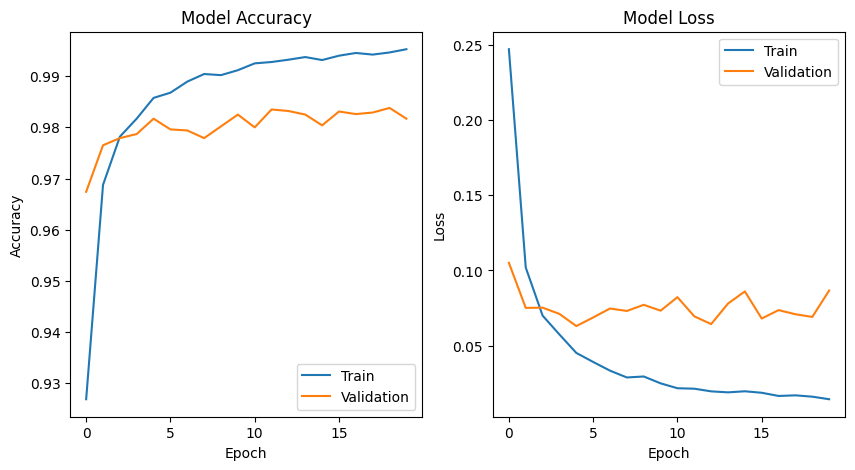

In [11]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a simple neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model and record the training history
history = model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
                    epochs=20, batch_size=128)

# plot the training and validation accuracy and loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

Part 2

Plotting one of the images in the test data, and then performing inferencing to check the prediction of the model
on that single image

Epoch 1/20
469/469 [==============================] - 4s 5ms/step - loss: 0.2464 - accuracy: 0.9270 - val_loss: 0.0983 - val_accuracy: 0.9686
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1006 - accuracy: 0.9699 - val_loss: 0.0774 - val_accuracy: 0.9744
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0747 - accuracy: 0.9764 - val_loss: 0.0813 - val_accuracy: 0.9742
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0553 - accuracy: 0.9823 - val_loss: 0.0614 - val_accuracy: 0.9805
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0476 - accuracy: 0.9847 - val_loss: 0.0626 - val_accuracy: 0.9801
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0387 - accuracy: 0.9876 - val_loss: 0.0612 - val_accuracy: 0.9817
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0345 - accuracy: 0.9886 - val_loss: 0.0735 - val_accuracy: 0.9782
Epoch 

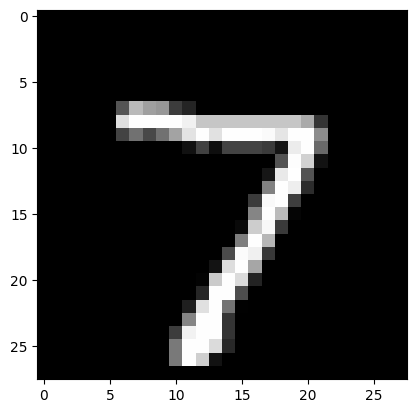

1/1 [==============================] - 0s 77ms/step
Model prediction: 7


In [12]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a simple neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
          epochs=20, batch_size=128)

# plot one of the images in the test data
plt.imshow(x_test[0], cmap='gray')
plt.show()

# make a prediction on the image using the trained model
prediction = model.predict(x_test[0].reshape(1, -1))
print('Model prediction:', np.argmax(prediction))


Part 3

Changing the number of hidden layer and the
activation function

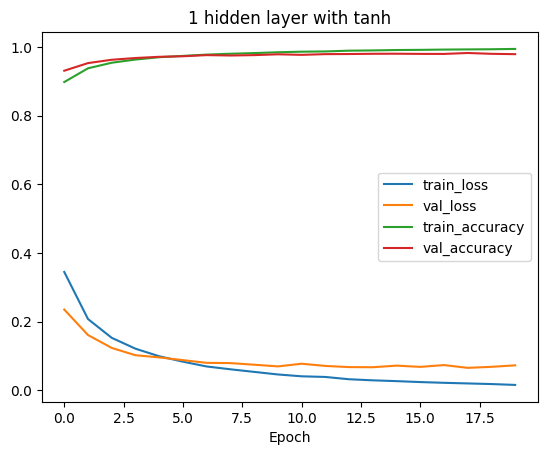

1 hidden layer with tanh - Test loss: 0.0732, Test accuracy: 0.9792


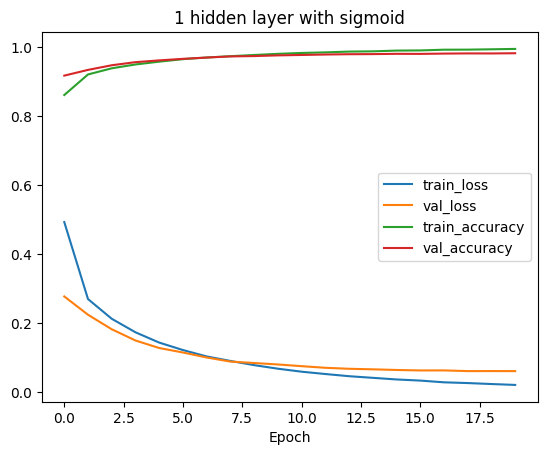

1 hidden layer with sigmoid - Test loss: 0.0614, Test accuracy: 0.9817


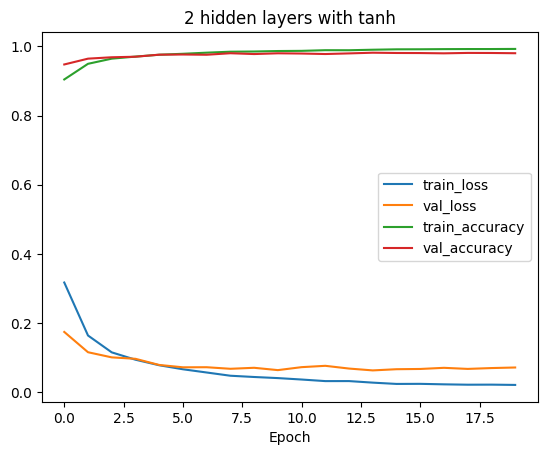

2 hidden layers with tanh - Test loss: 0.0713, Test accuracy: 0.9803


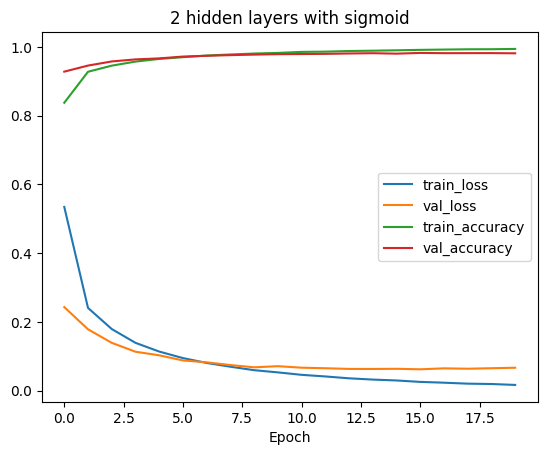

2 hidden layers with sigmoid - Test loss: 0.0663, Test accuracy: 0.9817


In [13]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a list of models to train
models = []

# model with 1 hidden layer and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with tanh', model))

# model with 1 hidden layer and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with sigmoid', model))

# model with 2 hidden layers and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with tanh', model))

# model with 2 hidden layers and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with sigmoid', model))

# train each model and plot loss and accuracy curves
for name, model in models:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
                        epochs=20, batch_size=128, verbose=0)
    # plot loss and accuracy curves
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(name)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    # evaluate the model on test data
    loss, accuracy = model.evaluate(x_test.reshape(-1, 784), y_test, verbose=0)
    print('{} - Test loss: {:.4f}, Test accuracy: {:.4f}'.format(name, loss, accuracy))


Part 4

 without scaling the images

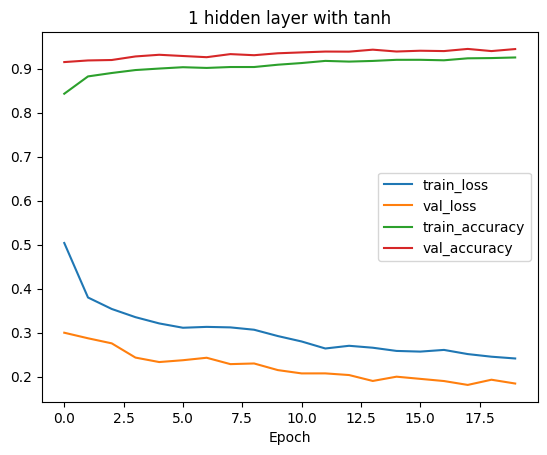

1 hidden layer with tanh - Test loss: 0.1843, Test accuracy: 0.9448


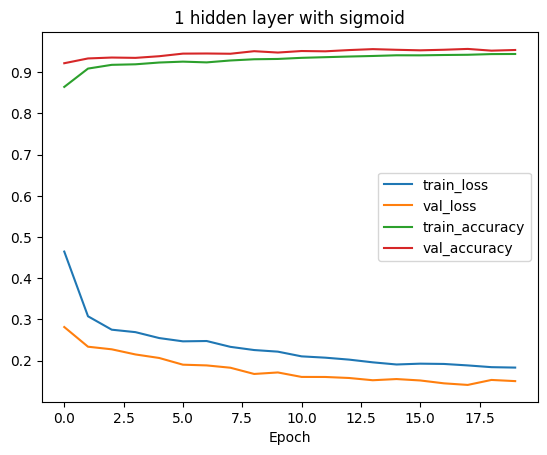

1 hidden layer with sigmoid - Test loss: 0.1506, Test accuracy: 0.9536


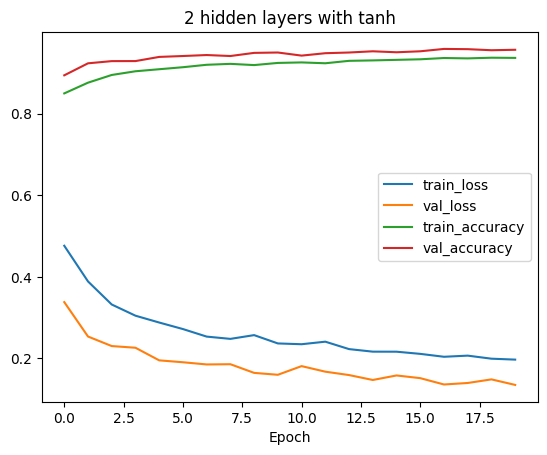

2 hidden layers with tanh - Test loss: 0.1349, Test accuracy: 0.9566


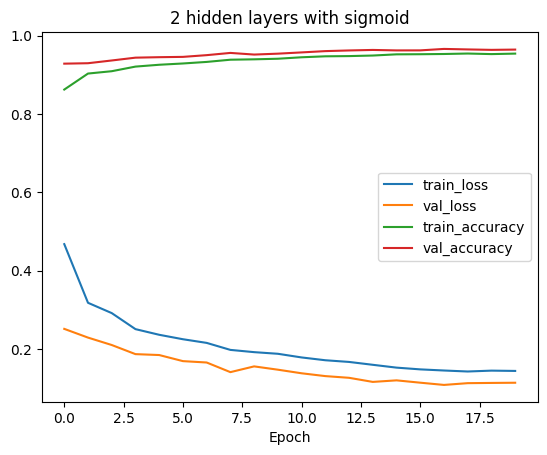

2 hidden layers with sigmoid - Test loss: 0.1139, Test accuracy: 0.9642


In [14]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# convert class labels to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# create a list of models to train
models = []

# model with 1 hidden layer and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with tanh', model))

# model with 1 hidden layer and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with sigmoid', model))

# model with 2 hidden layers and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with tanh', model))

# model with 2 hidden layers and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with sigmoid', model))

# train each model and plot loss and accuracy curves
for name, model in models:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train.reshape(-1, 784), y_train, validation_data=(x_test.reshape(-1, 784), y_test),
                        epochs=20, batch_size=128, verbose=0)
    # plot loss and accuracy curves
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(name)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    # evaluate the model on test data
    loss, accuracy = model.evaluate(x_test.reshape(-1, 784), y_test, verbose=0)
    print('{} - Test loss: {:.4f}, Test accuracy: {:.4f}'.format(name, loss, accuracy))
